# Import Data & Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 
import graphviz
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Shark Tank Dataset.csv")

In [3]:
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data exploration

In [4]:
print(data.shape)
data.head()

(551, 51)


,Unnamed: 0,Company,SeasonEpisode,ReceiveOffer,RejectOffer,Deal_Yes,Deal_No,Number of Presenters,Eth1,Eth2,...,EquityRequested,ImpliedValuationRequested,BarbaraCorcoran,MarkCuban,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest
0,1,Wispots,Shark.Tank.S01E01,0,0,0,1,1,2,0,...,0.10,12000000.0,1,0,0,1,1,1,1,0
1,2,CollegeFoxesPackingBoxes,Shark.Tank.S01E01,1,1,0,1,2,4,2,...,0.25,1000000.0,1,0,0,1,1,1,1,0
2,3,Mr.TodsPieFactory,Shark.Tank.S01E01,1,0,1,0,1,1,0,...,0.10,4600000.0,1,0,0,1,1,1,1,0
3,4,AvatheElephant,Shark.Tank.S01E01,1,0,1,0,1,2,0,...,0.15,333333.0,1,0,0,1,1,1,1,0
4,5,AttachNoted,Shark.Tank.S01E02,0,0,0,1,1,3,0,...,0.20,500000.0,1,0,0,1,1,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   551 non-null    int64  
 1   Company                      551 non-null    object 
 2   SeasonEpisode                551 non-null    object 
 3   ReceiveOffer                 551 non-null    int64  
 4   RejectOffer                  551 non-null    int64  
 5   Deal_Yes                     551 non-null    int64  
 6   Deal_No                      551 non-null    int64  
 7   Number of Presenters         551 non-null    int64  
 8   Eth1                         551 non-null    int64  
 9   Eth2                         551 non-null    int64  
 10  Eth3                         551 non-null    int64  
 11  Eth4                         551 non-null    int64  
 12  Eth5                         551 non-null    int64  
 13  Male1               

In [6]:
data.describe()

,Unnamed: 0,ReceiveOffer,RejectOffer,Deal_Yes,Deal_No,Number of Presenters,Eth1,Eth2,Eth3,Eth4,...,EquityRequested,ImpliedValuationRequested,BarbaraCorcoran,MarkCuban,LoriGreiner,RobertHerjavec,DaymondJohn,KevinOLeary,KevinHarrington,Guest
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,...,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,276.000000,0.622505,0.070780,0.546279,0.453721,1.539020,2.163339,1.134301,0.114338,0.007260,...,0.157599,2.829148e+06,0.597096,0.898367,0.718693,0.931034,0.653358,0.960073,0.087114,0.163339
std,159.204271,0.485201,0.256691,0.498306,0.498306,0.604395,0.759545,1.328062,0.528801,0.120385,...,0.094684,4.689956e+06,0.490927,0.302440,0.450045,0.253626,0.476333,0.195967,0.282259,0.370011
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.015000,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.500000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.100000,5.000000e+05,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,276.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.150000,1.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,413.500000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.200000,2.500000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,551.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,1.000000,4.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    301
0    250
Name: Deal_Yes, dtype: int64


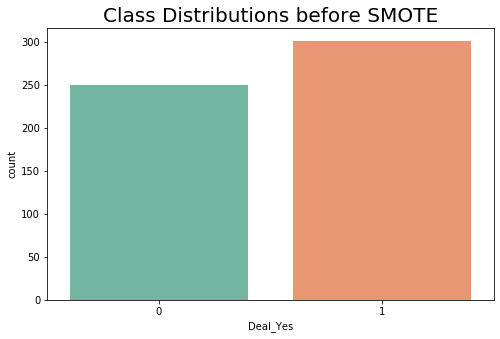

In [7]:
#Check for data Imbalance 
plt.figure(figsize = (8,5))
print(data['Deal_Yes'].value_counts())
plt.title('Class Distributions before SMOTE', fontsize=20)
sns.countplot('Deal_Yes',data=data, palette='Set2')

### Correlation Matrix

In [8]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(200,200))     
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

#### What are the most correlated columns ? 

In [9]:
upper_tri = data.corr().abs().where(np.triu(np.ones(data.corr().abs().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]   
print(to_drop)

['Deal_Yes', 'Deal_No', 'Eth2', 'Female1', 'Female4', 'FemalePresenter', 'KevinHarrington']


### Duplicate

In [10]:
data.duplicated().sum()

0

### Null Values

In [11]:
data.isnull().sum().sort_values(ascending=False)

CompanyState                   73
Guest                           0
Eth5                            0
Health / Wellness               0
Novelties                       0
Female4                         0
Female3                         0
Female2                         0
Female1                         0
Male4                           0
Male3                           0
Male2                           0
Male1                           0
Eth4                            0
Business Services               0
Eth3                            0
Eth2                            0
Eth1                            0
Number of Presenters            0
Deal_No                         0
Deal_Yes                        0
RejectOffer                     0
ReceiveOffer                    0
SeasonEpisode                   0
Company                         0
Food and Beverage               0
Lifestyle / Home                0
KevinHarrington                 0
Software / Tech                 0
KevinOLeary   

# Train-Test Split 

In [12]:
Statedummies = pd.get_dummies(data['CompanyState'])
data = pd.concat([data, Statedummies], axis=1)

In [13]:
data = data.drop(['CompanyState'], axis=1)

In [14]:
data.shape

(551, 96)

In [15]:
#Split data into X Features and y labels
X = data.drop(["Company","Unnamed: 0","SeasonEpisode","RejectOffer","Deal_No","Deal_Yes"],
              axis=1
             )
y = data["Deal_Yes"]

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size = 0.2, random_state=0)




## Logistic Regression

In [16]:
#Logistic Regression
l_clf = LogisticRegression()
l_clf.fit(X_train, y_train)
y_test_pred = l_clf.predict(X_test)
print('\033[1m')
print('                     Logistic Regression :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,l_clf.score(X_test, y_test) * 100)


                     Logistic Regression :

              precision    recall  f1-score   support

           0       0.38      0.81      0.52        43
           1       0.58      0.16      0.25        68

    accuracy                           0.41       111
   macro avg       0.48      0.49      0.39       111
weighted avg       0.50      0.41      0.36       111

Score : 41.44144144144144


Text(0.5, 15.0, 'Predicted label')

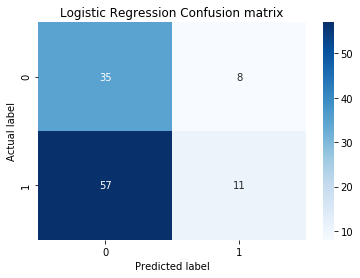

In [17]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### K-Nearest Neighbors

In [18]:
#K-Nearest Neighbors
k_clf = KNeighborsClassifier()
k_clf.fit(X_train, y_train)
y_test_pred = k_clf.predict(X_test)
print('\033[1m')
print('                     K-Nearest Neighbors :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,k_clf.score(X_test, y_test) * 100)


                     K-Nearest Neighbors :

              precision    recall  f1-score   support

           0       0.43      0.53      0.48        43
           1       0.66      0.56      0.60        68

    accuracy                           0.55       111
   macro avg       0.54      0.55      0.54       111
weighted avg       0.57      0.55      0.56       111

Score : 54.95495495495496


Text(0.5, 15.0, 'Predicted label')

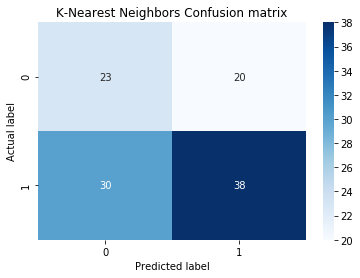

In [19]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('K-Nearest Neighbors Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Decision Tree

In [20]:
#Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_test_pred = dt_clf.predict(X_test)
print('\033[1m')
print('                     Decision Tree :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,dt_clf.score(X_test, y_test) * 100)


                     Decision Tree :

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        43
           1       0.97      0.87      0.91        68

    accuracy                           0.90       111
   macro avg       0.89      0.91      0.90       111
weighted avg       0.91      0.90      0.90       111

Score : 90.09009009009009


Text(0.5, 15.0, 'Predicted label')

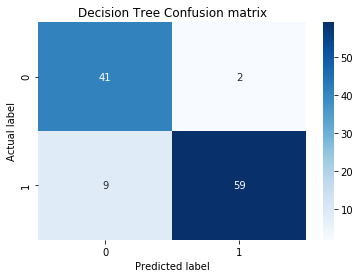

In [21]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
dt_clf.tree_.max_depth

16

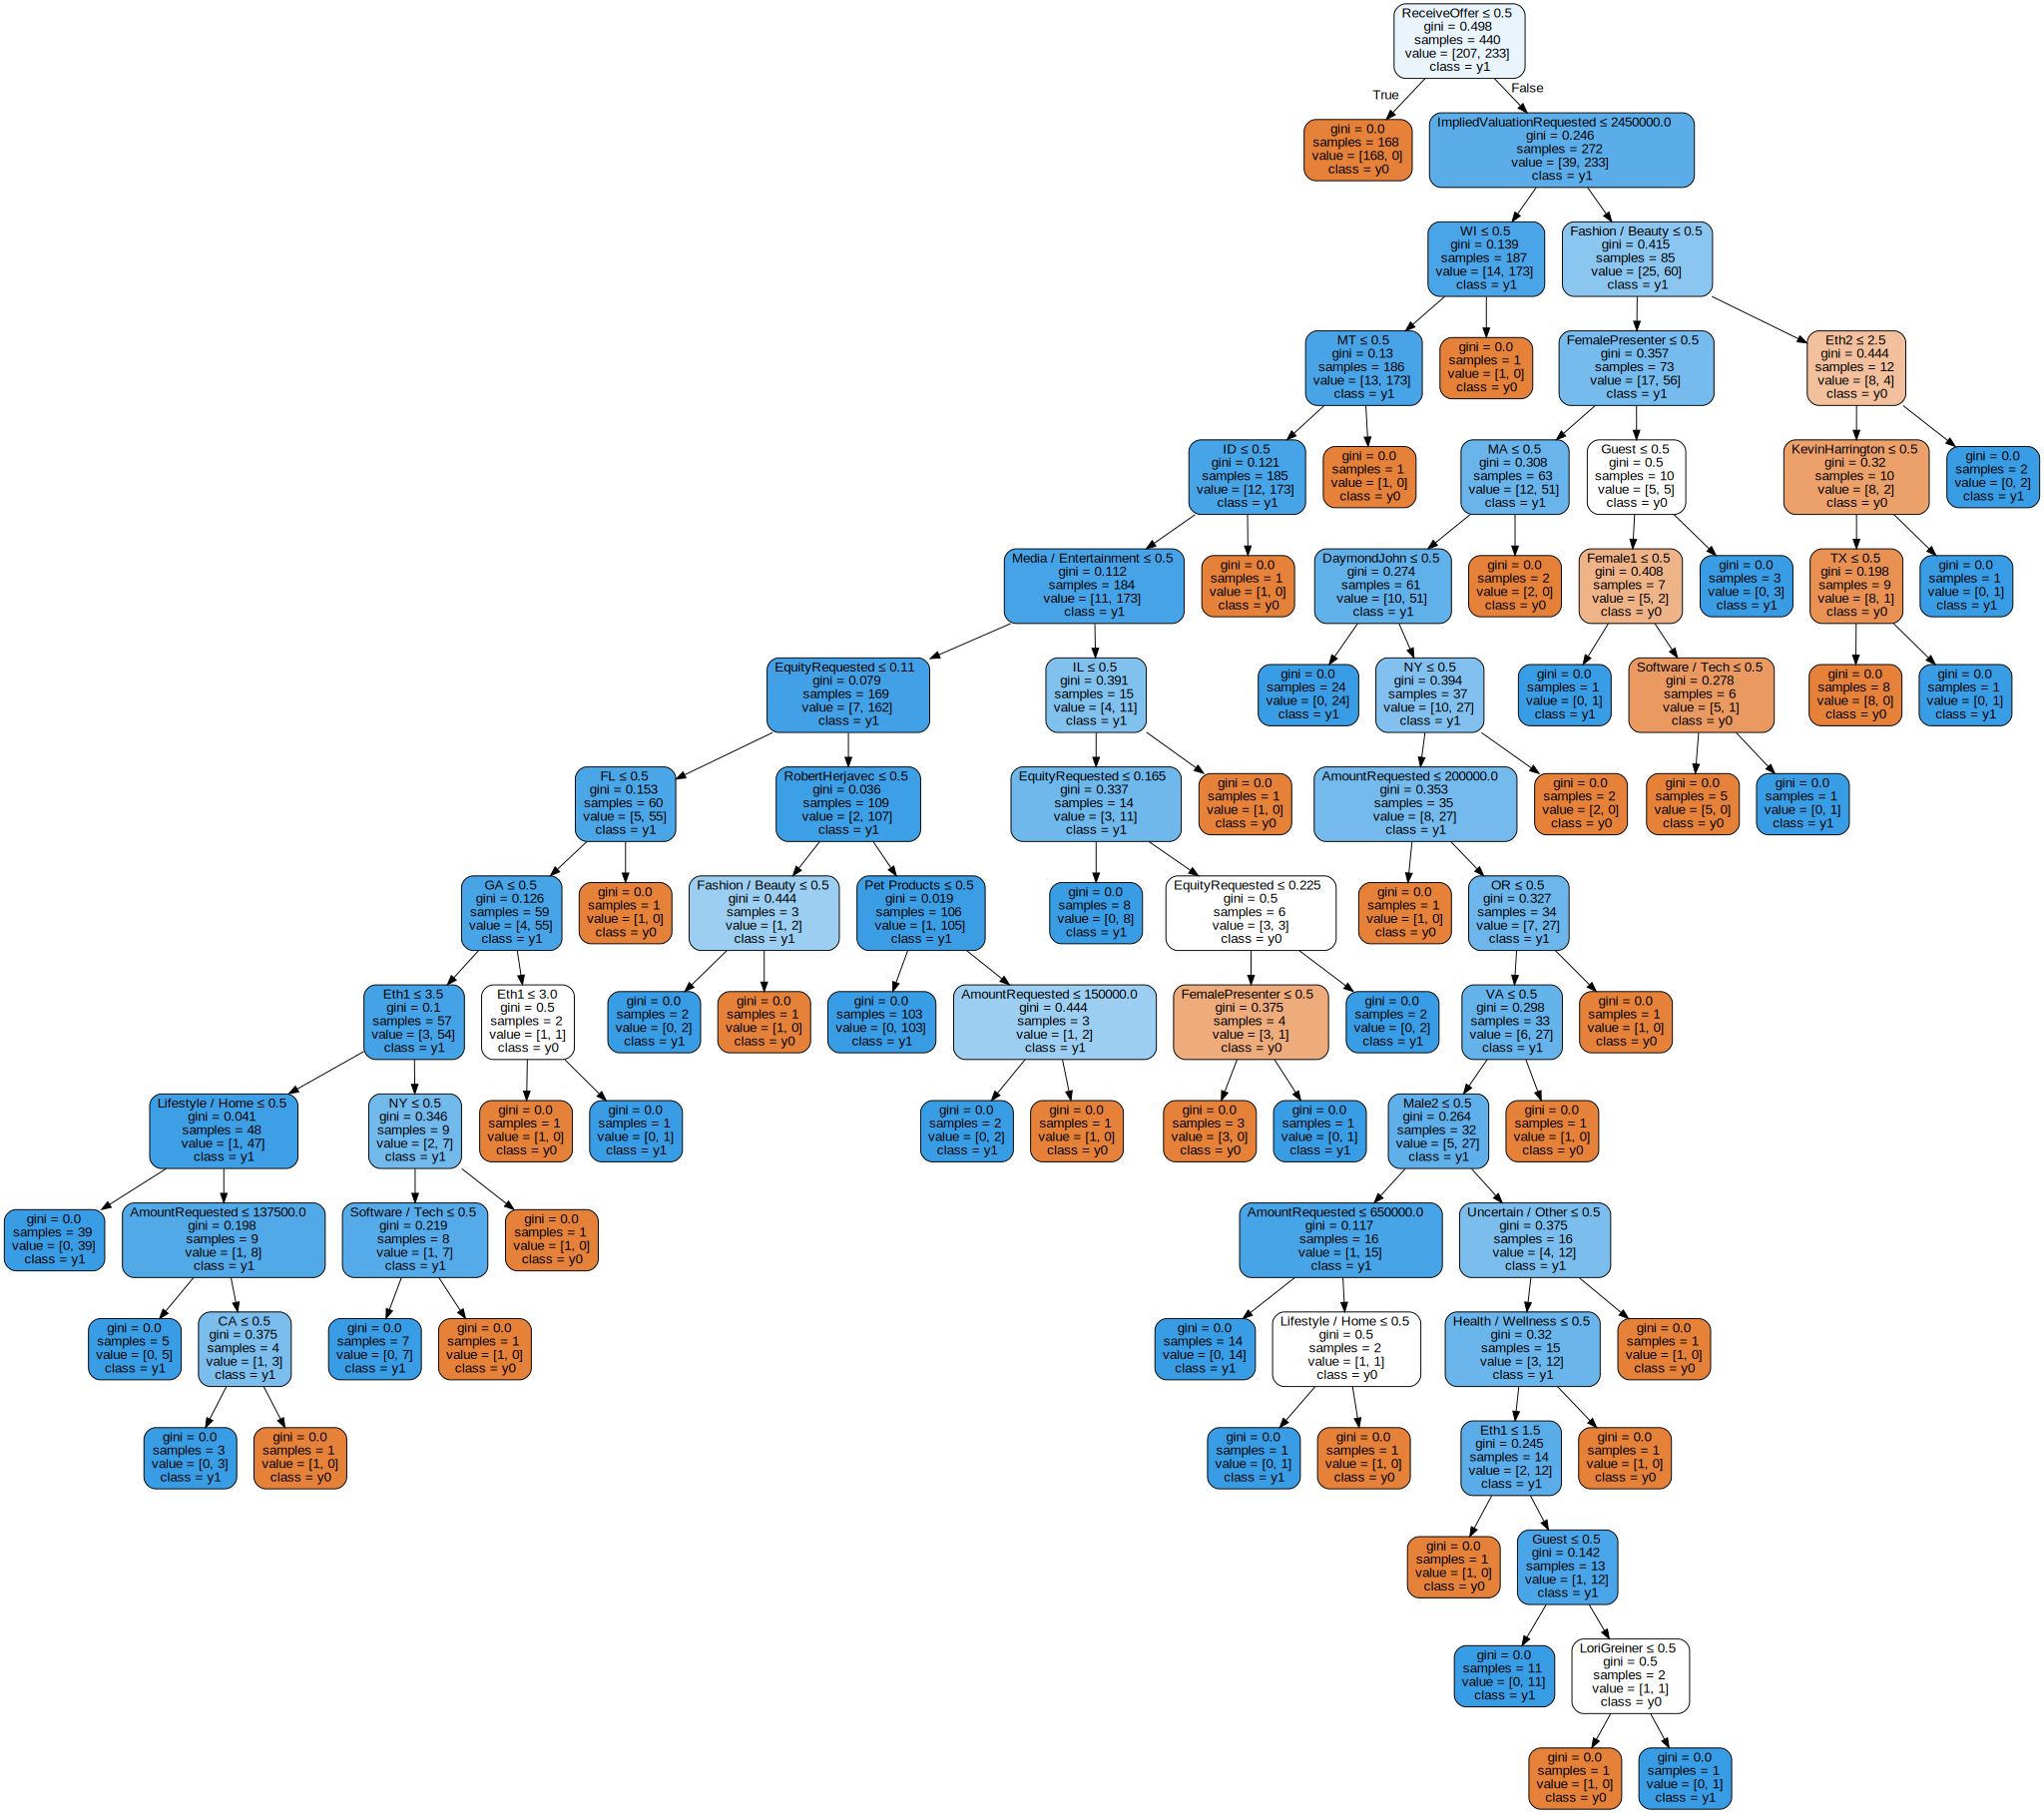

In [23]:
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Random Forest

In [24]:
#Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_test_pred = rf_clf.predict(X_test)
print('\033[1m')
print('                     Random Forest :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,rf_clf.score(X_test, y_test) * 100)


                     Random Forest :

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        68

    accuracy                           0.94       111
   macro avg       0.93      0.94      0.93       111
weighted avg       0.94      0.94      0.94       111

Score : 93.69369369369369


Text(0.5, 15.0, 'Predicted label')

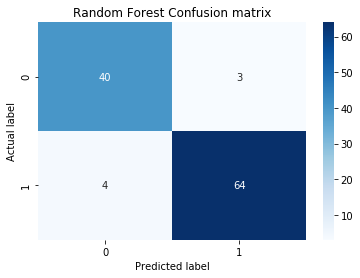

In [25]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Support Vector Machine

In [26]:
#Support Vector Machine
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_test_pred = svc_clf.predict(X_test)
print('\033[1m')
print('                     Support Vector Machine :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,svc_clf.score(X_test, y_test) * 100)


                     Support Vector Machine :

              precision    recall  f1-score   support

           0       0.50      0.09      0.16        43
           1       0.62      0.94      0.75        68

    accuracy                           0.61       111
   macro avg       0.56      0.52      0.45       111
weighted avg       0.57      0.61      0.52       111

Score : 61.261261261261254


Text(0.5, 15.0, 'Predicted label')

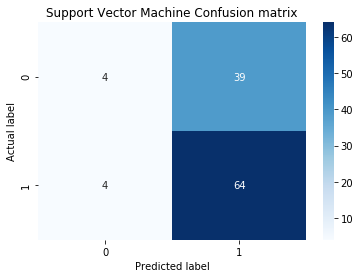

In [27]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Multi-Layer Perceptron classifier

In [28]:
#Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, activation='relu')
mlp.fit(X_train, y_train.values.ravel())
y_test_pred = mlp.predict(X_test)

print('\033[1m')
print('                     MLP :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,svc_clf.score(X_test, y_test) * 100)


                     MLP :

              precision    recall  f1-score   support

           0       0.39      0.21      0.27        43
           1       0.61      0.79      0.69        68

    accuracy                           0.57       111
   macro avg       0.50      0.50      0.48       111
weighted avg       0.53      0.57      0.53       111

Score : 61.261261261261254


Text(0.5, 15.0, 'Predicted label')

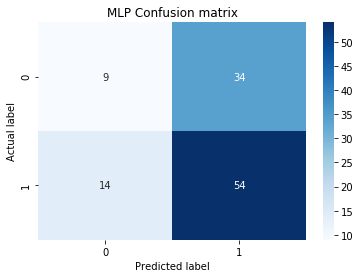

In [29]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('MLP Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree Hyperparameter tuning

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets

In [31]:
pca = decomposition.PCA()
std_slc = StandardScaler()
tree = DecisionTreeClassifier()

In [32]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'max_depth' : range(2,26,2),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv= 5, scoring= 'f1')
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [33]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [34]:
y_test_pred = tree.predict(X_test)
print('\033[1m')
print('                     New Decision Tree :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,tree.score(X_test, y_test) * 100)



                     New Decision Tree :

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        43
           1       0.97      0.88      0.92        68

    accuracy                           0.91       111
   macro avg       0.90      0.92      0.91       111
weighted avg       0.92      0.91      0.91       111

Score : 90.990990990991


Text(0.5, 15.0, 'Predicted label')

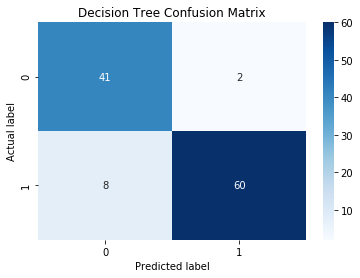

In [35]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")

plt.title("Decision Tree Confusion Matrix", y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

XGBoosting & Stacked Classifier

### Comparing Model Accuracies

In [41]:
# Creating a dataframe to compare our models' performances:
predictive_model_scores = pd.DataFrame(data=[('Logistic Regression',41.44),
                                             ('K-Nearest Neighbors',54.95),
                                             ('Support Vector Machine',61.26),
                                             ('MLP',61.26),
                                             ('Decision Tree',90.09), 
                                             ('Random Forest',93.69)],
                                       columns=['model', 'training_score'])
predictive_model_scores

,model,training_score
0,Logistic Regression,41.44
1,K-Nearest Neighbors,54.95
2,Support Vector Machine,61.26
3,MLP,61.26
4,Decision Tree,90.09
5,Random Forest,93.69


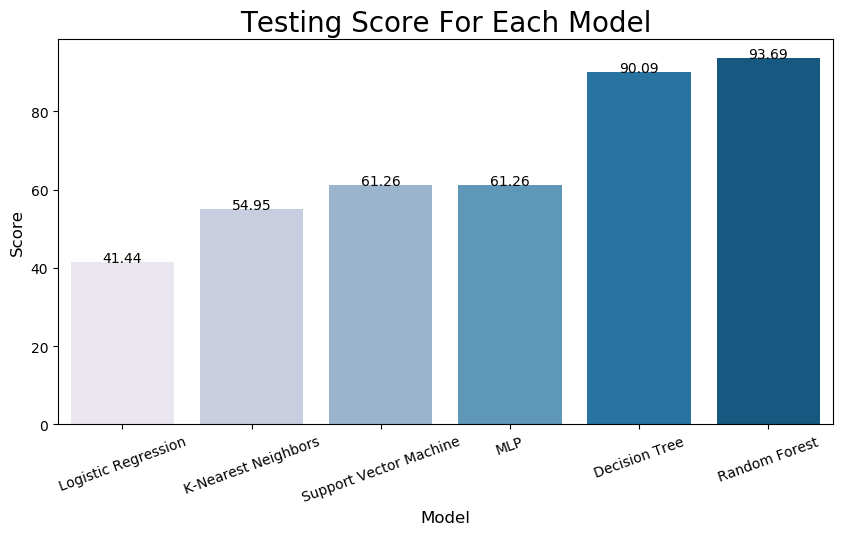

In [53]:
# Visualizing testing score of each model: 
plt.style.use('default')
plt.figure(figsize=(10,5))
p=sns.barplot(x='model', y='training_score', data=predictive_model_scores, palette='PuBu')
plt.title('Testing Score For Each Model', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.xticks(rotation=20)
plt.ylabel('Score', fontsize = 12)
for index, row in predictive_model_scores.iterrows():
    p.text(x=row.name, y=row.training_score, s=round(row.training_score,2), color='black', horizontalalignment='center');